In [16]:
from make_data import make_data 
from DWT import discrete_wavelet_denoise, log_return 
from CWT import CWT
import numpy as np 
import os
from tqdm import tqdm

In [2]:
import yfinance as yf
SP500 = yf.download('SPY', keepna = True )

[*********************100%***********************]  1 of 1 completed


In [7]:
data = make_data (SP500)
signal = data['Adj Close'].to_numpy()

In [12]:


def generate_image(sample ,path, level_discrete_wavelet_transform,discrete_wavelet = 'db4',continuous_wavelet = 'cmor', **kwargs ) : 
    """
    generates an image from a portion of the signal
    
    Parameters 
    ----------
    sample : array
        the portion of the signal to be analyzed
    path : string
        path to save the image
    
    level_discrete_wavelet_transform :int
        level of discrete wavelet transform
        
    discrete_wavelet : string
        Type of the DWT (adapted to the package pywt)
    
    continous_wavelet : string
        Type of the CWT (adapted to the package pywt)
        
    kwargs : dict
        Parameters of the continuous wavelet
        
    """
    denoised_sample = discrete_wavelet_denoise (sample , wavelet = discrete_wavelet, level = level_discrete_wavelet_transform)
    log_ret = log_return(denoised_sample)
    CWT (log_ret,wavelet = continuous_wavelet, show = False ,path = path, **kwargs  )



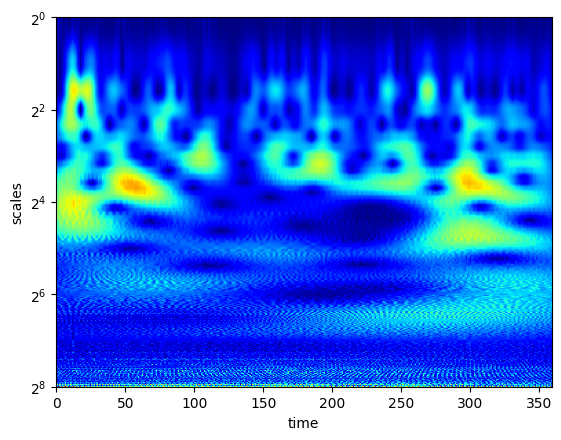

In [7]:
## Test 
window_size = 360
level_discrete_wavelet_transform = 1
sample = signal[:window_size]
kwargs = {'b' : 2., 'c' : 1. }
path = os.path.join('k', 'scalo')
generate_image(sample ,path, level_discrete_wavelet_transform,discrete_wavelet = 'db4',continuous_wavelet = 'cmor', **kwargs ) 

In [13]:
def generate_labels(signal, window_size, method ='mean' ):
    
    if (method == 'mean'):
        moving_average = np.convolve(signal, np.ones(window_size)/window_size, mode='valid')[:-1] ## exclude last sample cuz no label
        next_day = signal[window_size : ]
        labels = 1*(next_day>moving_average)
    
    return labels
        

In [17]:
def generate_NN_dataset(signal , window_size,method_labels = 'mean',level_discrete_wavelet_transform = 2,discrete_wavelet = 'db4',continuous_wavelet = 'cmor', **kwargs ):
    
    """
    generate an image from a portion of the signal
    
    Parameters 
    ----------
    signal : array
        the whole signal to be analyzed (one time series)
    window_size : int
        The length of the generate photo
        
    method_labels : string
        default : 'mean' 
        how to generate the labels : 'mean' means the labels are generated 
        as follows : ref the paper https://arxiv.org/pdf/2008.06042.pdf
    
    level_discrete_wavelet_transform :int
        level of discrete wavelet transform
        
    discrete_wavelet : string
        Type of the DWT (adapted to the package pywt)
    
    continous_wavelet : string
        Type of the CWT (adapted to the package pywt)
        
    kwargs : dict
        Parameters of the continuous wavelet
        
    
    Returns
    --------
    images in folders 0/ and 1/ according to the label of the image
    """
    
    # create folder per label
    os.makedirs('0', exist_ok=True)
    os.makedirs('1', exist_ok=True)
    
    #labels
    labels =  generate_labels(signal, window_size, method =method_labels )
    
    #create images
    for i in tqdm(range(signal.shape[0] - window_size + 1)):
        
        sample = signal[i:i+window_size]
        
        path = os.path.join(str(labels[i]), str(i))
        
        generate_image(
            sample ,
            path,
            level_discrete_wavelet_transform,
            discrete_wavelet = discrete_wavelet,
            continuous_wavelet =continuous_wavelet,
             **kwargs ) 
    
    

  0%|▏                                                                             | 22/7228 [00:33<3:03:17,  1.53s/it]


KeyboardInterrupt: 

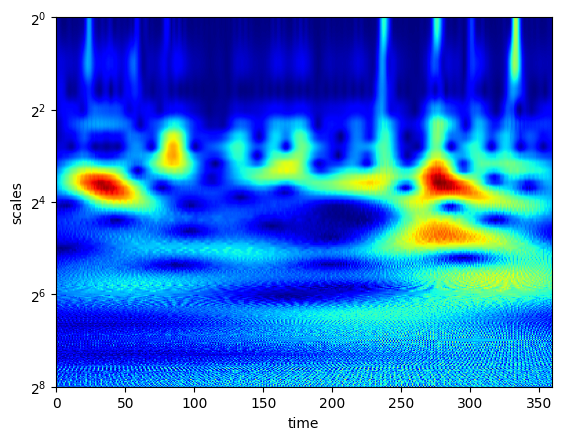

In [18]:
window_size = 360
level_discrete_wavelet_transform = 1
kwargs = {'b' : 2., 'c' : 1. }
generate_NN_dataset(signal , window_size,method_labels = 'mean',level_discrete_wavelet_transform = 2,discrete_wavelet = 'db4',continuous_wavelet = 'cmor', **kwargs )

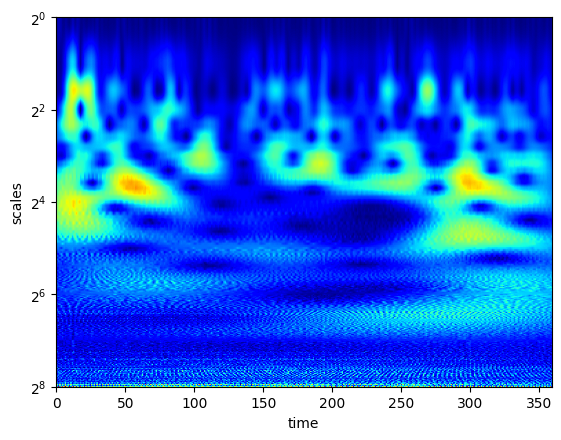

array([[1.99625117e-04, 3.71141756e-04, 3.02652306e-04, ...,
        1.22720794e-04, 4.87489112e-05, 1.40743736e-05],
       [4.21281522e-04, 5.24853594e-04, 5.25192064e-04, ...,
        1.29633041e-04, 7.29909020e-05, 1.80704151e-04],
       [2.87832372e-04, 2.30450291e-04, 1.58852308e-04, ...,
        9.27095877e-04, 7.40799497e-04, 5.36400668e-04],
       ...,
       [5.02234637e-03, 2.20875868e-03, 6.98775863e-03, ...,
        4.93063265e-04, 1.53028176e-03, 2.30835025e-03],
       [8.09202682e-03, 1.86194842e-03, 9.69011492e-03, ...,
        6.97472159e-03, 9.46780202e-04, 4.25429563e-03],
       [1.79337790e-03, 9.68310446e-03, 1.77386106e-04, ...,
        1.98384087e-03, 7.67919778e-03, 6.67146295e-04]])

In [8]:
window_size = 360
level_discrete_wavelet_transform = 1
sample = signal[: window_size]
denoised_sample = discrete_wavelet_denoise (sample , wavelet = 'db4', level = level_discrete_wavelet_transform)
log_ret = log_return(denoised_sample)
kwargs = {'b' : 2., 'c' : 1. }
CWT (log_ret,wavelet = 'cmor', show = True , **kwargs  )



In [ ]:
import matplotlib.pyplot as plt 
plt.plot(sample)
plt.plot(denoised_sample)